In [1]:
import fromscratchtoml
fromscratchtoml.use("numpy")
fromscratchtoml.use("cupy")

from fromscratchtoml.neural_network.models import Sequential
from fromscratchtoml.neural_network.optimizers import StochasticGradientDescent
from fromscratchtoml.neural_network.layers import Dense, Activation

import numpy as np
import cupy as np

from sklearn.model_selection import train_test_split

from fromscratchtoml.toolbox.random import Distribution
from fromscratchtoml.toolbox.preprocess import to_onehot


In [2]:
from sklearn import datasets
from sklearn.utils import shuffle

from fromscratchtoml.toolbox import binary_visualize

%matplotlib inline

# Neural Networks

## Fitting a XOR gate

In [3]:
model1 = Sequential()
model1.add(Dense(5, input_dim=2, seed=1))
model1.add(Activation('sigmoid'))
model1.add(Dense(5, seed=2))
model1.add(Activation('sigmoid'))
model1.add(Dense(2, seed=3))
sgd = StochasticGradientDescent(learning_rate=0.1)
model1.compile(optimizer=sgd, loss="mean_squared_error")

In [4]:
X1 = np.array([[0, 0],[0, 1],[1, 0], [1, 1]])
y1 = np.array([[1,0], [0,1], [0,1], [1,0]])
y1

array([[1, 0],
       [0, 1],
       [0, 1],
       [1, 0]])

In [5]:
%time model1.fit(X1, y1, batch_size=None, epochs=500)

[███████████████████████████████████████ ] 99% 
epoch: 1000/1000  acc: 100.00  loss: 0.034 
[████████████████████████████████████████] 100% CPU times: user 3.07 s, sys: 336 ms, total: 3.4 s
Wall time: 3.11 s


In [6]:
type(model1.layers[0].weights)

cupy.core.core.ndarray

In [7]:
model1.layers[-1].biases

array([[ 0.88208246, -0.30754758]])

In [8]:
model1.layers[-1].weights

array([[-0.77159976,  1.9138817 ],
       [-2.21760329,  1.83737509],
       [ 2.61862123, -1.56292831],
       [ 0.96159024, -0.52000019],
       [-0.4535551 , -1.21643687]])

In [9]:
model1.predict(X1)

array([0, 1, 1, 0], dtype=int64)

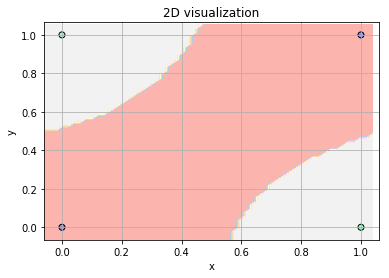

In [10]:
binary_visualize(X1, clf=model1, draw_contour=True)

## MNIST Digit Classification

In [11]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original', data_home=".")
print(len(mnist.data))
X2 = mnist.data/256.
mnist.target.__class__
y2 = to_onehot(mnist.target)

70000


In [12]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=10000, random_state=42)
X_train2.shape, y_train2.shape, X_train2.dtype

((60000, 784), (60000, 10), dtype('float64'))

In [39]:
from fromscratchtoml.neural_network.regularizers import l1, l2, l1_l2

model2 = Sequential(verbose=True)
model2.add(Dense(30, input_dim=784, kernel_regularizer=l2(), seed=10))
model2.add(Activation('sigmoid'))
model2.add(Dense(10, kernel_regularizer=l2(), seed=10))
model2.add(Activation('sigmoid'))
sgd = StochasticGradientDescent(learning_rate=2)
model2.compile(optimizer=sgd, loss="cross_entropy")

In [40]:
%time model2.fit(X_train2, y_train2, batch_size=256, epochs=10)


epoch: 1/10  acc: 94.50  loss: 0.734 
[████                                    ] 10% 
epoch: 2/10  acc: 95.66  loss: 0.567 
[████████                                ] 20% 
epoch: 3/10  acc: 96.21  loss: 0.498 
[████████████                            ] 30% 
epoch: 4/10  acc: 96.61  loss: 0.456 
[████████████████                        ] 40% 
epoch: 5/10  acc: 96.86  loss: 0.427 
[████████████████████                    ] 50% 
epoch: 6/10  acc: 97.05  loss: 0.403 
[████████████████████████                ] 60% 
epoch: 7/10  acc: 97.22  loss: 0.383 
[████████████████████████████            ] 70% 
epoch: 8/10  acc: 97.35  loss: 0.366 
[████████████████████████████████        ] 80% 
epoch: 9/10  acc: 97.42  loss: 0.355 
[████████████████████████████████████    ] 90% 
epoch: 10/10  acc: 97.48  loss: 0.348 
[████████████████████████████████████████] 100% CPU times: user 8.47 s, sys: 489 ms, total: 8.95 s
Wall time: 8.94 s


In [37]:
model2.predict(X_train2[12:17]), np.argmax(y_train2[12:17], axis=1)

(array([0, 0, 3, 9, 5], dtype=int64), array([0, 0, 3, 9, 5], dtype=int64))

In [38]:
model2.accuracy(X_test2, y_test2)

96.845

## Training a single perceptron

In [17]:
model3 = Sequential()
model3.add(Dense(1, input_dim=1, seed=10))
model3.add(Activation('sigmoid'))
sgd = StochasticGradientDescent(learning_rate=0.5)
model3.compile(optimizer=sgd, loss="mean_squared_error")

In [18]:
X3 = np.array([1])
y3 = np.array([0.2])

In [19]:
%time model3.fit(X3, y3, epochs=100)

[███████████████████████████████████████ ] 99% 
epoch: 100/100  acc: 50.00  loss: 0.001 
[████████████████████████████████████████] 100% CPU times: user 370 ms, sys: 31 ms, total: 401 ms
Wall time: 348 ms


In [20]:
model3.forwardpass(X3)

array([[0.16347943]])

## Iris Dataset

In [21]:
iris = datasets.load_iris()

X4 = iris.data[:, :2]
Y4 = to_onehot(iris.target[:])
X4, Y4 = shuffle(X4, Y4, random_state=10)

Xtrain4 = X4[:120]
Ytrain4 = Y4[:120]
Xtest4 = X4[120:]
Ytest4 = Y4[120:]

In [22]:
model4 = Sequential()
model4.add(Dense(5, input_dim=2, seed=1))
model4.add(Activation('sigmoid'))
model4.add(Dense(3, seed=2))
model4.add(Activation('sigmoid'))
sgd = StochasticGradientDescent(learning_rate=0.1)
model4.compile(optimizer=sgd, loss="mean_squared_error")

In [23]:
%time model4.fit(Xtrain4, Ytrain4, batch_size=32, epochs=100)

[███████████████████████████████████████ ] 99% 
epoch: 100/100  acc: 85.83  loss: 0.114 
[████████████████████████████████████████] 100% CPU times: user 1.02 s, sys: 24.6 ms, total: 1.04 s
Wall time: 992 ms


In [24]:
model4.predict(Xtrain4[:5]), Ytest4[:5]

(array([2, 2, 0, 1, 0], dtype=int64), array([[0., 1., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [1., 0., 0.],
        [0., 0., 1.]]))

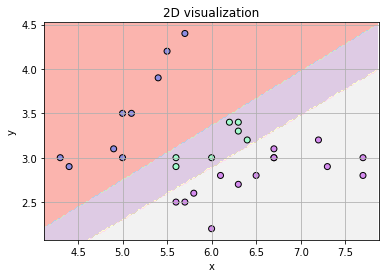

In [25]:
binary_visualize(Xtest4, clf=model4, draw_contour=True)

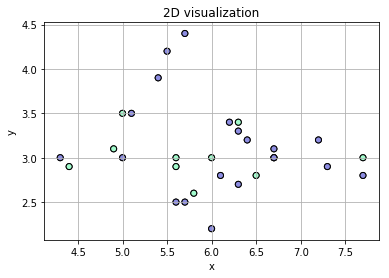

In [26]:
binary_visualize(Xtest4, Ytest4)

## Radial

In [27]:
X11 = Distribution.radial_binary(pts=300,
               mean=[0, 0],
               st=1,
               ed=2, seed=20)
X22 = Distribution.radial_binary(pts=300,
               mean=[0, 0],
               st=4,
               ed=5, seed=20)

Y11 = np.ones(X11.shape[0])
Y22 = np.zeros(X11.shape[0])

X5 = np.vstack((X11, X22))
y5 = np.hstack((Y11, Y22))

In [28]:
y5 = to_onehot(y5)

In [29]:
X_train5, X_test5, y_train5, y_test5 = train_test_split(X5, y5, test_size=50, random_state=42)

In [30]:
y_train5.shape

(550, 2)

In [31]:
model5 = Sequential(verbose=1, vis_each_epoch=True)
model5.add(Dense(10, input_dim=2, seed=1))
model5.add(Activation('sigmoid'))
model5.add(Dense(2, seed=2))
model5.add(Activation('sigmoid'))
model5.add(Dense(2, seed=3))
model5.add(Activation('sigmoid'))
sgd = StochasticGradientDescent(learning_rate=0.9)
model5.compile(optimizer=sgd, loss="mean_squared_error")

In [32]:
X_train5[0]

array([-0.81275208,  1.01547833])


epoch: 1/10  acc: 83.64  loss: 0.208 


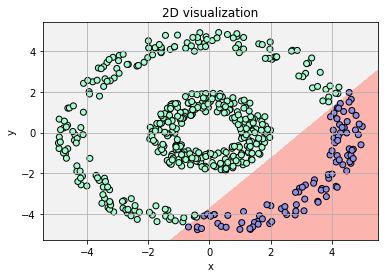

[████                                    ] 10% 
epoch: 2/10  acc: 84.18  loss: 0.198 


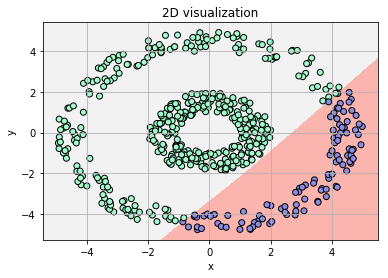

[████████                                ] 20% 
epoch: 3/10  acc: 84.36  loss: 0.195 


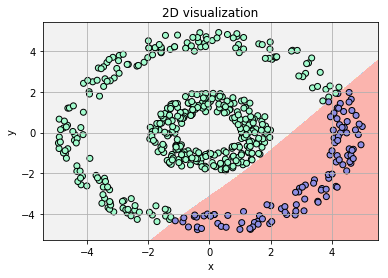

[████████████                            ] 30% 
epoch: 4/10  acc: 84.09  loss: 0.196 


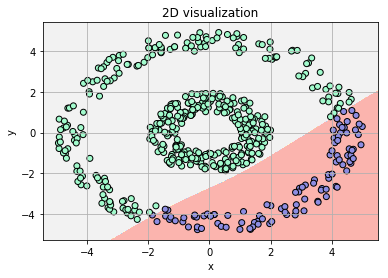

[████████████████                        ] 40% 
epoch: 5/10  acc: 83.73  loss: 0.199 


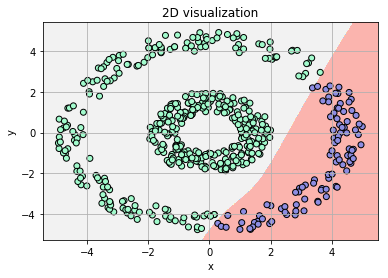

[████████████████████                    ] 50% 
epoch: 6/10  acc: 84.73  loss: 0.191 


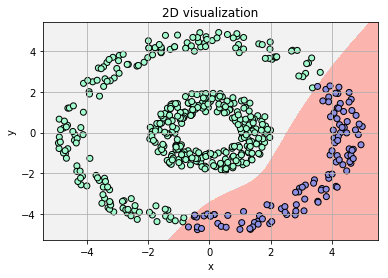

[████████████████████████                ] 60% 
epoch: 7/10  acc: 93.18  loss: 0.100 


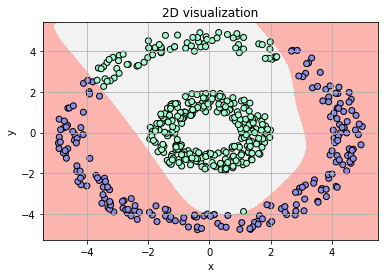

[████████████████████████████            ] 70% 
epoch: 8/10  acc: 100.00  loss: 0.007 


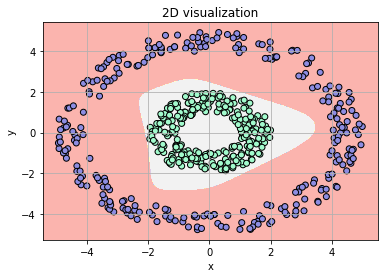

[████████████████████████████████        ] 80% 
epoch: 9/10  acc: 100.00  loss: 0.003 


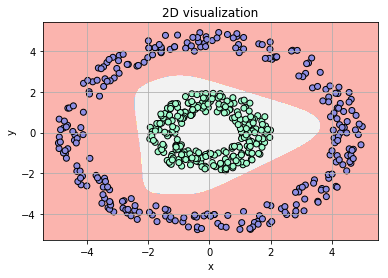

[████████████████████████████████████    ] 90% 
epoch: 10/10  acc: 100.00  loss: 0.002 


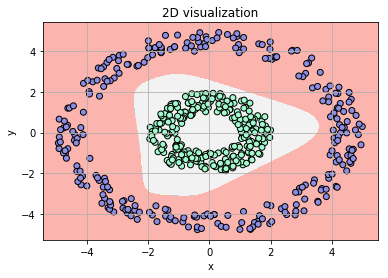

[████████████████████████████████████████] 100% CPU times: user 8.83 s, sys: 4.88 s, total: 13.7 s
Wall time: 7.04 s


In [33]:
%time model5.fit(X_train5, y_train5, batch_size=4, epochs=10)

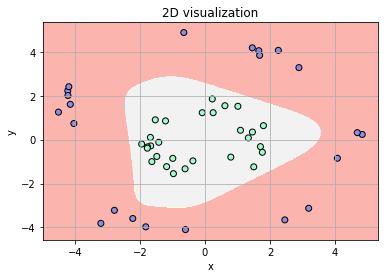

In [34]:
binary_visualize(X_test5, clf=model5, draw_contour=True)